In [2]:
!pip install pandas numpy matplotlib seaborn folium geopy

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 4.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.5 MB 2.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.5 MB 2.7 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.5 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.5 MB 2.6 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/11.5 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.4/11.5 MB 2.5 MB/s eta 0:00:04
   ------------- -------------------------- 3.9/11.5 MB 2.5 MB/s eta 0:00:04
   --------------- ------------------------ 4.5/11.5 MB 2.4 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.5 MB 2.5 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.5 MB 2.4 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.5 MB 2.3 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np

In [5]:
import pandas as pd
import numpy as np

# Load the Zomato dataset
data1 = pd.read_csv('file:///C:/Users/HESHWANTHINI/Downloads/zomato_data.csv')

# Check the structure of the data
data1.head()


,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:

data1['rate'] = data1['rate'].replace('-', np.nan)


data1['rate'] = data1['rate'].astype(str)
data1['rate'] = data1['rate'].str.replace('/5', '', regex=False)


data1['rate'] = pd.to_numeric(data1['rate'], errors='coerce')


data1['rate'] = data1['rate'].fillna(data1['rate'].median())


In [17]:

data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].astype(str).str.replace(',', '')


data1['approx_costfor_two_people'] = pd.to_numeric(data1['approx_costfor_two_people'], errors='coerce')


data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].fillna(data1['approx_costfor_two_people'].median())


In [18]:

data1['dish_liked'] = data1['dish_liked'].fillna('Not Available')
data1['cuisines'] = data1['cuisines'].fillna('Other')
data1['rest_type'] = data1['rest_type'].fillna('Unknown')


In [19]:
data1['votes'] = data1['votes'].fillna(data1['votes'].median())


In [20]:
data1['online_order'] = data1['online_order'].map({'Yes': 1, 'No': 0})
data1['book_table'] = data1['book_table'].map({'Yes': 1, 'No': 0})

In [21]:
data1['rate'] = data1['rate'].astype(float)
data1['votes'] = data1['votes'].astype(int)
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].astype(int)

In [34]:

print(data1.isnull().sum())
print(data1.info())
print(data1.describe())


online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int64  
 8   lis

In [24]:
data2 = pd.read_csv('file:///C:/Users/HESHWANTHINI/Downloads/Geographical Coordinates.csv')
merged_df = pd.merge(data1,data2,on='listed_incity',how='left')

In [26]:
data2.head()

,listed_incity,Latitude,Longitude
0,Banashankari,12.939333,77.553982
1,Bannerghatta Road,12.952660,77.605048
2,Basavanagudi,12.941726,77.575502
3,Bellandur,12.925352,77.675941
4,Brigade Road,12.967358,77.606435


In [27]:

merged_df_clean = merged_df.dropna(subset=['Latitude', 'Longitude'])
heat_data = [[row['Latitude'], row['Longitude']] for index, row in merged_df_clean.iterrows()]

m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

HeatMap(heat_data).add_to(m)

m.save('restaurant_density_map.html')


In [28]:

italian_restaurants = merged_df[merged_df['cuisines'].str.contains('Italian', na=False)]

m_italian = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

for index, row in italian_restaurants.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['name']).add_to(m_italian)

m_italian.save('italian_restaurants_map.html')


In [29]:
data1.describe()

,online_order,book_table,rate,votes,approx_costfor_two_people
count,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000
mean,0.588665,0.124698,3.700362,283.697527,554.391689
std,0.492080,0.330379,0.395391,803.838853,437.563723
min,0.000000,0.000000,1.800000,0.000000,40.000000
25%,0.000000,0.000000,3.500000,7.000000,300.000000
50%,1.000000,0.000000,3.700000,41.000000,400.000000
75%,1.000000,0.000000,3.900000,198.000000,650.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


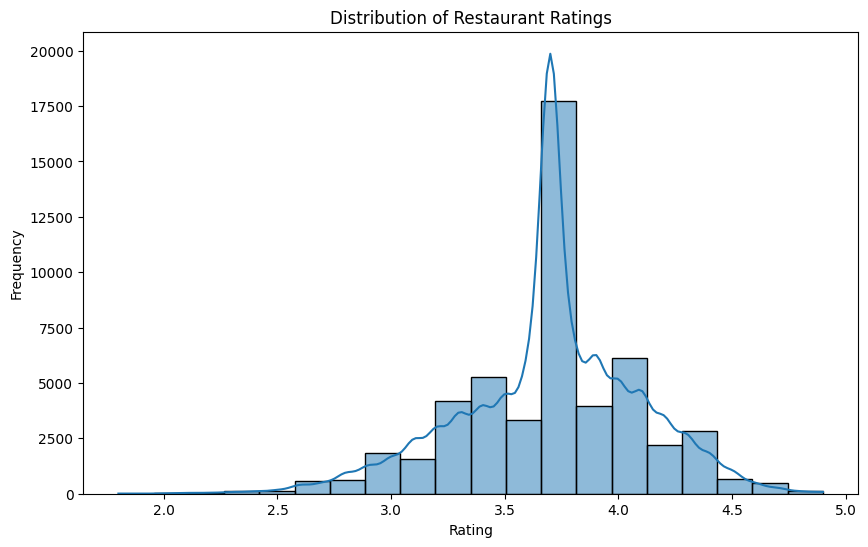

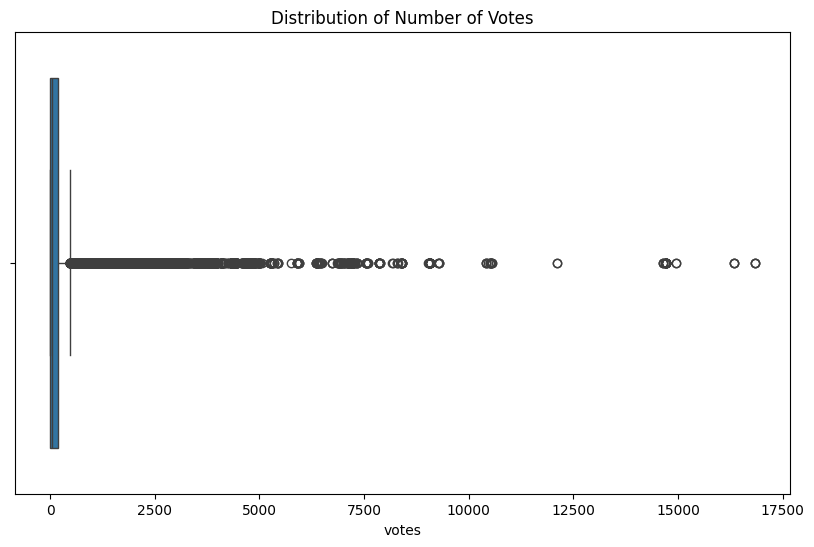

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data1['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data1['votes'])
plt.title('Distribution of Number of Votes')
plt.show()


In [33]:

print(merged_df[['Latitude', 'Longitude']].isnull().sum())

merged_df_cleaned = merged_df.dropna(subset=['Latitude', 'Longitude'])

heat_data = [[row['Latitude'], row['Longitude']] for index, row in merged_df_cleaned.iterrows()]

m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
HeatMap(heat_data).add_to(m)

display(m)


Latitude     5580
Longitude    5580
dtype: int64


In [36]:
import pandas as pd

df = pd.read_csv("file:///C:/Users/HESHWANTHINI/Downloads/zomato_data.csv")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 51717, Columns: 10


In [40]:
import folium
from IPython.display import display


italian_df = merged_df[merged_df['cuisines'].str.contains('italian', case=False, na=False)]

italian_df = italian_df.dropna(subset=['Latitude', 'Longitude'])

italian_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

for _, row in italian_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['cuisines'],
        tooltip=row['name'] if 'name' in row else "Italian Restaurant"
    ).add_to(italian_map)

display(italian_map)


In [74]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

heat_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

heat_data = [[row['Latitude'], row['Longitude']] for index, row in heat_df.iterrows()]

m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

HeatMap(heat_data, radius=10, blur=15, min_opacity=0.4).add_to(m)

display(m)



In [49]:
import pandas as pd

# Load the dataset
data = pd.read_csv('file:///C:/Users/HESHWANTHINI/Downloads/zomato_data.csv')


data = data.dropna(subset=['cuisines'])


north_indian_restaurants = data[data['cuisines'].str.contains('North Indian', case=False, na=False)]

print("Number of restaurants that serve North Indian cuisine:", len(north_indian_restaurants))


Number of restaurants that serve North Indian cuisine: 21085


In [50]:
import pandas as pd

data = pd.read_csv('file:///C:/Users/HESHWANTHINI/Downloads/zomato_data.csv') 

data = data.dropna(subset=['cuisines'])

data['cuisines_split'] = data['cuisines'].str.split(', ')
all_cuisines = data.explode('cuisines_split')

cuisine_counts = all_cuisines['cuisines_split'].value_counts()

most_common_cuisine = cuisine_counts.idxmax()
most_common_count = cuisine_counts.max()

print(f"The most commonly offered cuisine is '{most_common_cuisine}' with {most_common_count} restaurants.")


The most commonly offered cuisine is 'North Indian' with 21085 restaurants.


In [61]:
import pandas as pd

# Load the dataset
df = pd.read_csv('file:///C:/Users/HESHWANTHINI/Downloads/zomato_data.csv')

# Check column names
print(df.columns.tolist())

# Assume important columns are:
# 'online_order' --> whether restaurant allows online ordering
# 'listed_incity' --> location/locality of restaurant

# Step 1: Filter restaurants that allow online ordering
df_online = df[df['online_order'] == 'Yes']

# Step 2: Among them, filter restaurants in Banashankari
banashankari_online = df_online[df_online['listed_incity'].str.contains('Banashankari', case=False, na=False)]

# Step 3: Calculate the percentage
percentage_banashankari = (len(banashankari_online) / len(df_online)) * 100

print("\n=====================================")
print(f"Percentage of total online orders received by Banashankari restaurants: {percentage_banashankari:.2f}%")
print("=====================================")


['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype', 'listed_incity']

Percentage of total online orders received by Banashankari restaurants: 1.79%


In [62]:
import pandas as pd

# Load the dataset
df = pd.read_csv('file:///C:/Users/HESHWANTHINI/Downloads/zomato_data.csv')

# Clean the columns
df['rate'] = df['rate'].astype(str).str.replace('/5', '').str.strip()
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

df['votes'] = df['votes'].astype(str).str.replace(',', '').str.strip()
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Filter: High rating, high votes, online ordering allowed
df_filtered = df[
    (df['rate'] > 4.2) &
    (df['votes'] > 500) &
    (df['online_order'] == 'Yes')
]

# Now check which area (listed_incity) has the maximum such restaurants
top_area = df_filtered['listed_incity'].value_counts().idxmax()

print("\n=====================================")
print(f"Zomato should invest in: {top_area}")
print("=====================================")



Zomato should invest in: MG Road


In [63]:
import pandas as pd

# Sample data
data = {
    'rest_type': ['Bakery, Cafe', 'Casual Dining, Pub', 'Bakery', 'Microbrewery, Pub'],
    'rate': [4.1, 4.2, 3.9, 4.0],
    'votes': [1200, 1500, 950, 1100]
}

# Create DataFrame
df = pd.DataFrame(data)

# Filter for restaurant types with over 1000 votes
filtered_df = df[df['votes'] > 1000]

# Find the restaurant type with the top rating
top_rated_rest_type = filtered_df.loc[filtered_df['rate'].idxmax()]

print(f"The restaurant type with the top rating and over 1000 votes is: {top_rated_rest_type['rest_type']} with a rating of {top_rated_rest_type['rate']}/5 and {top_rated_rest_type['votes']} votes.")

The restaurant type with the top rating and over 1000 votes is: Casual Dining, Pub with a rating of 4.2/5 and 1500 votes.


In [64]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/HESHWANTHINI/Downloads/zomato_data(1).csv')

# Clean and convert the 'rate' column
data['rate'] = data['rate'].replace('NEW', None)
data['rate'] = data['rate'].replace('-', None)
data['rate'] = data['rate'].str.replace('/5', '', regex=False)
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')

# Convert votes to numeric
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')

# Filter for restaurants with more than 1000 votes
filtered = data[data['votes'] > 1000]

# Drop rows with missing rate or rest_type
filtered = filtered.dropna(subset=['rate', 'rest_type'])

# Group by restaurant type and find average rating
rest_type_rating = filtered.groupby('rest_type')['rate'].mean()

# Sort to find the restaurant type with the top rating
top_rated_type = rest_type_rating.sort_values(ascending=False).head(1)

print("Restaurant type with the top rating (with over 1000 votes):")
print(top_rated_type)


Restaurant type with the top rating (with over 1000 votes):
rest_type
Bakery    4.8
Name: rate, dtype: float64


In [66]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/HESHWANTHINI/Downloads/zomato_data(1).csv')

# Show column names to find the correct one
print(data.columns.tolist())


['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype', 'listed_incity']


In [70]:
import pandas as pd

# Load the dataset (update the file path if needed)
data = pd.read_csv('C:/Users/HESHWANTHINI/Downloads/zomato_data(1).csv')

# Display the column names to verify
print("Available columns:", data.columns)

# Clean and prepare data
# Ensure 'location' and 'online_order' columns exist
if 'location' in data.columns and 'online_order' in data.columns:
    # Filter restaurants in Banashankari
    banashankari_data = data[data['listed_incity'].str.contains('Banashankari', case=False, na=False)]

    # Consider only restaurants that accept online orders
    total_online_restaurants = data[data['online_order'].str.lower() == 'yes']
    banashankari_online_restaurants = banashankari_data[banashankari_data['online_order'].str.lower() == 'yes']

    # Calculate percentage
    total_online_count = len(total_online_restaurants)
    banashankari_online_count = len(banashankari_online_restaurants)

    if total_online_count > 0:
        percentage = (banashankari_online_count / total_online_count) * 100
        print(f"📦 Banashankari restaurants account for approximately {percentage:.2f}% of total online-order-enabled restaurants in Bangalore.")
    else:
        print("❗ No restaurants in the dataset have online ordering enabled.")
else:
    print("❗ Required columns 'location' or 'online_order' not found in the dataset.")


Available columns: Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')
❗ Required columns 'location' or 'online_order' not found in the dataset.


In [71]:
import pandas as pd

# Load the data
data = pd.read_csv('C:/Users/HESHWANTHINI/Downloads/zomato_data(1).csv')

# Show all column names
print("Column Names in the dataset:")
print(data.columns.tolist())


Column Names in the dataset:
['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype', 'listed_incity']


In [72]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/HESHWANTHINI/Downloads/zomato_data(1).csv')

# Drop rows where 'online_order' or 'listed_incity' is missing
data = data.dropna(subset=['online_order', 'listed_incity'])

# Filter total restaurants accepting online orders
online_orders_total = data[data['online_order'].str.lower() == 'yes']

# Filter restaurants in Banashankari accepting online orders
banashankari_online = online_orders_total[online_orders_total['listed_incity'].str.lower() == 'banashankari']

# Calculate percentage
percentage = (len(banashankari_online) / len(online_orders_total)) * 100 if len(online_orders_total) > 0 else 0

print(f"📍 Restaurants in Banashankari account for approximately {percentage:.2f}% of all online-order-enabled restaurants in Bangalore.")


📍 Restaurants in Banashankari account for approximately 1.79% of all online-order-enabled restaurants in Bangalore.


In [73]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/HESHWANTHINI/Downloads/zomato_data(1).csv')

# Ensure correct column names
# Columns: 'online_order', 'listed_incity'

# Remove missing values from required columns
data_clean = data.dropna(subset=['online_order', 'listed_incity'])

# Convert to lowercase for consistency
data_clean['online_order'] = data_clean['online_order'].str.lower()
data_clean['listed_incity'] = data_clean['listed_incity'].str.lower()

# Filter restaurants that accept online orders
online_order_data = data_clean[data_clean['online_order'] == 'yes']

# Total number of restaurants accepting online orders
total_online_orders = len(online_order_data)

# Number of online-order restaurants in Banashankari
banashankari_online_orders = len(online_order_data[online_order_data['listed_incity'] == 'banashankari'])

# Calculate percentage
percentage = (banashankari_online_orders / total_online_orders) * 100

# Output
print(f"✅ Percentage of online orders from Banashankari: {percentage:.2f}%")


✅ Percentage of online orders from Banashankari: 1.79%
